In [2]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# Hand-in assignment

We are going to solve a deconvolution problem $Ku = f$, where $K$ is a *Toeplitz matrix* with elements
$$k_{ij} = \frac{\exp({-a\cdot (i-j)^2})}{(n-1)\sqrt{\pi/a}},$$ 
and we are given noisy measurements 
$$f^{\delta} = Ku + e,$$
where the entries of $e$ are normally distrubuted with mean zero and variance $\delta^2$.

An example of a typical image $u$ and its corresponding noisy measurements $f^\delta$ is shown below

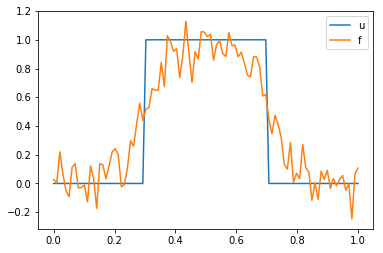

In [3]:
n = 100
a = 100
delta = 1e-1
x = np.linspace(0,1,n)


c = np.exp(-a*x**2)/((n-1)*np.sqrt(np.pi/a))
K = la.toeplitz(c)

u = abs(x - 0.5)<.2
f = K@u + delta*np.random.randn(n)
plt.figure()
plt.plot(x,u,label='u')
plt.plot(x,f,label='f')
plt.legend()
plt.show()

The goal of this assignment is to solve this inverse problem using a (truncated) SVD for two scenario's

1. `u` as defined above
2. `u = x*(x-1)`

1. Is this problem ill-posed in general? Why? 
2. Compute the (pseudo-)inverse of $K$ using the SVD and compute the backward error $|u - u^{\delta}|_2$ for noise levels $\delta = 0.001, 0.01, 0.1$ for both scenario's; what do you notice?
3. Compute a regularized solution using a truncated SVD for noise levels $\delta = 0.001, 0.01, 0.1$ for both scenario's. Manually choose the truncation paramater $k$ in each case to get the best possible solution. What do you notice here?
4. Explain your observations by investigating what the singular vectors look like (think about the discrete Picard condition as well).

### Some prelimary stuff

In [4]:
# Define u's to use
u_scen1 = abs(x - 0.5)<.2
u_scen2 = x*(x-1)

# Define f's to use
f_scen1 = K@u_scen1
f_scen2 = K@u_scen2

# Exercise 1:

In [5]:
# Condition number
condition_number = np.linalg.cond(K)
print(condition_number)

1.7953884822764224e+18


High condition number means that K in ill-posed in general

# Exercise 2

## Scenario 1

In [6]:
K_pseudo = np.linalg.pinv(K)
for delta in [0.0001, 0.01, 0.1]:
    f_delta = K@u_scen1 + delta*np.random.randn(n)
    error = np.linalg.norm(u_scen1-K_pseudo@f_delta)
    print("Backward error for delta = {} is {}".format(delta,error))


Backward error for delta = 0.0001 is 30580342143.37041
Backward error for delta = 0.01 is 5675316072549.259
Backward error for delta = 0.1 is 40277870541796.59


## Scenario 2

In [7]:
K_pseudo = np.linalg.pinv(K)
for delta in [0.0001, 0.01, 0.1]:
    f_delta = K@u_scen2 + delta*np.random.randn(n)
    error = np.linalg.norm(u_scen2-K_pseudo@f_delta)
    print("Backward error for delta = {} is {}".format(delta,error))

Backward error for delta = 0.0001 is 14082639257.896494
Backward error for delta = 0.01 is 3950061492832.4634
Backward error for delta = 0.1 is 9354151296708.047


## Notice

Both backward errors are extremely high regardless of the noise level.

# Exercise 3

## Scenario 1

 --- Backward error for rcond=0.001 --- 
Backward error for delta = 0.0001 is 1.1382364474923536
Backward error for delta = 0.01 is 8.320767530820257
Backward error for delta = 0.1 is 47.31920989597976
 --- Backward error for rcond=0.0005 --- 
Backward error for delta = 0.0001 is 1.0391299419680065
Backward error for delta = 0.01 is 16.122702032288693
Backward error for delta = 0.1 is 114.40801115393728
 --- Backward error for rcond=0.001 --- 
Backward error for delta = 0.0001 is 1.1389807855399159
Backward error for delta = 0.01 is 2.617381165847446
Backward error for delta = 0.1 is 47.02681490741933
 --- Backward error for rcond=0.005 --- 
Backward error for delta = 0.0001 is 1.1454083754101687
Backward error for delta = 0.01 is 1.6697348438827153
Backward error for delta = 0.1 is 19.205765625733747
 --- Backward error for rcond=0.01 --- 
Backward error for delta = 0.0001 is 1.1451878919485912
Backward error for delta = 0.01 is 1.325861691349576
Backward error for delta = 0.1 is 4.57

/mnt/c/Data/Vakken/Inverse_Problems_in_Imaging/venv/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


 --- Backward error for rcond=0 --- 
Backward error for delta = 0.0001 is 11426283597092.781
Backward error for delta = 0.01 is 1416611528414048.2
Backward error for delta = 0.1 is 1.3922973808610088e+16


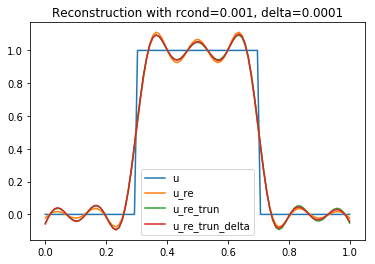

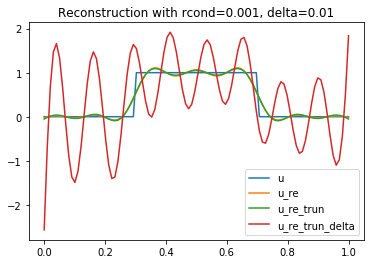

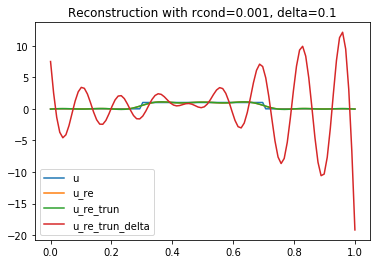

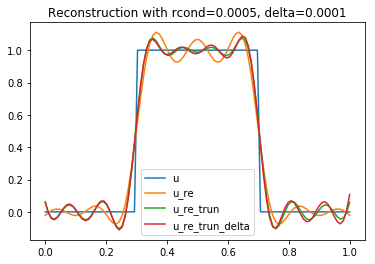

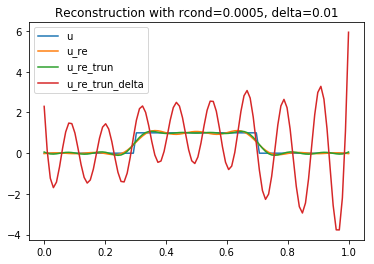

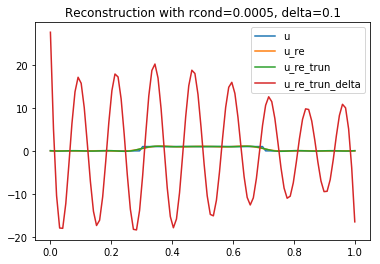

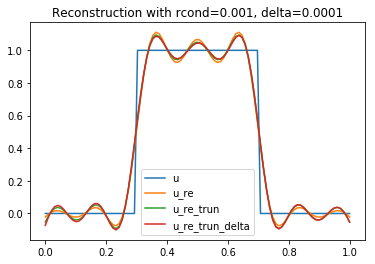

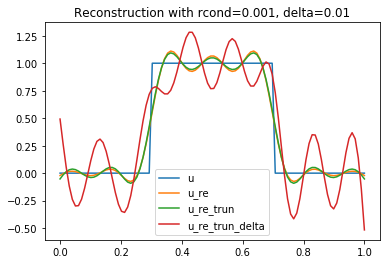

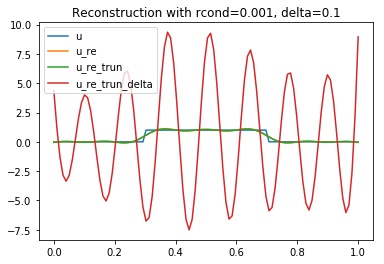

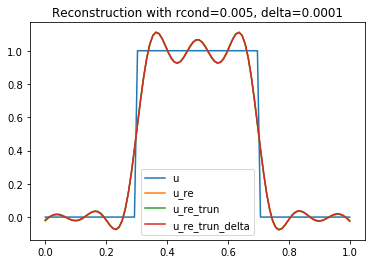

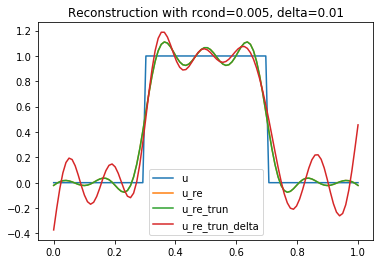

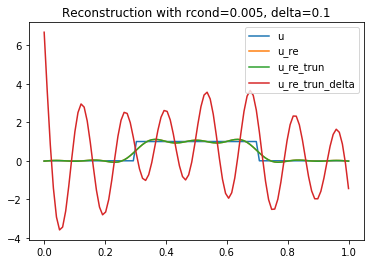

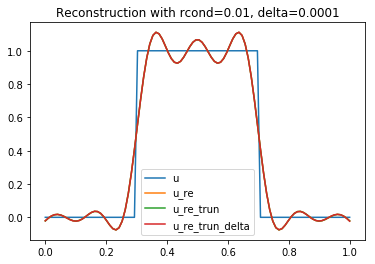

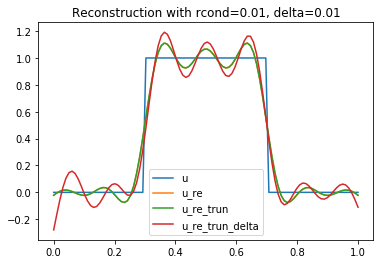

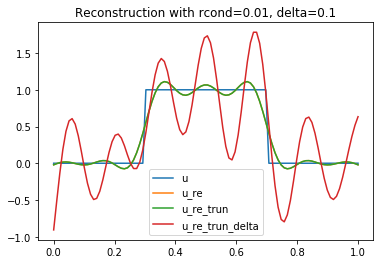

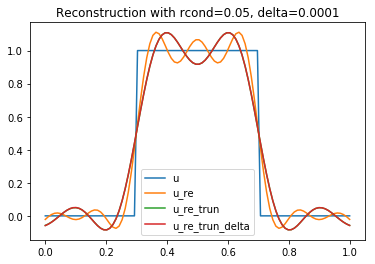

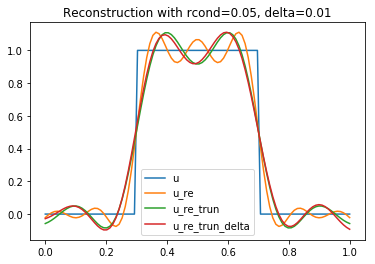

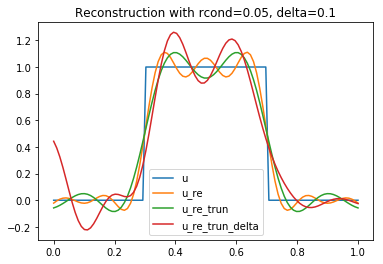

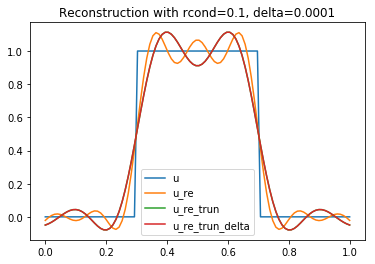

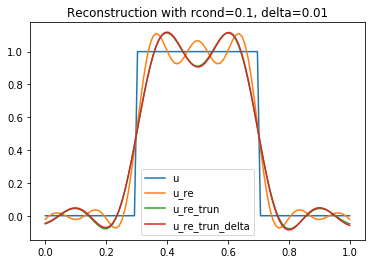

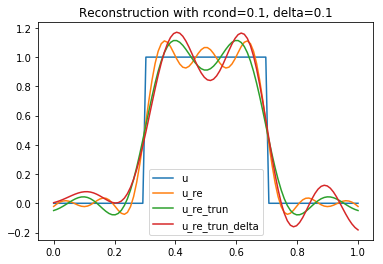

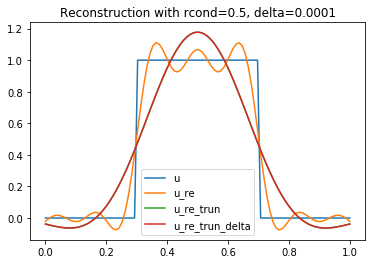

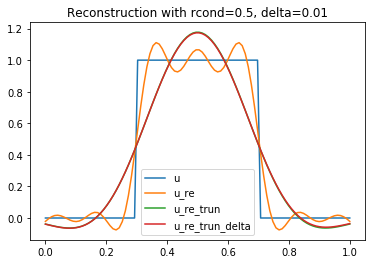

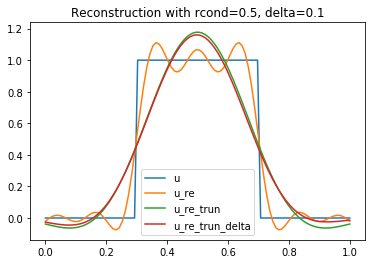

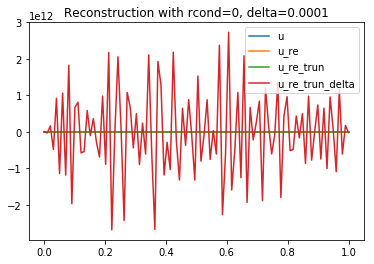

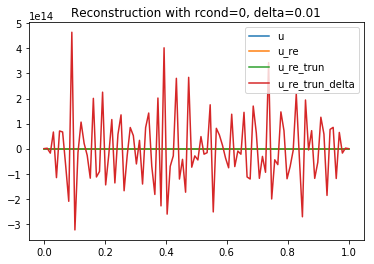

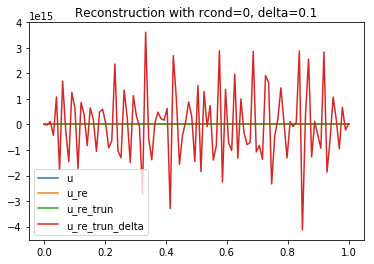

In [21]:
for k in [0.001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,0]:
    print(" --- Backward error for rcond={} --- ".format(k))
    for delta in [0.0001, 0.01, 0.1]:
        K_pseudo_truncated = np.linalg.pinv(K, rcond=k)
        f_delta = K@u_scen1 + delta*np.random.randn(n)
        error = np.linalg.norm(u_scen1-K_pseudo_truncated@f_delta)
        print("Backward error for delta = {} is {}".format(delta,error))
        plt.figure()
        plt.title("Reconstruction with rcond={}, delta={}".format(k,delta))
        plt.plot(x,u_scen1,label='u')
        plt.plot(x,K_pseudo@f_scen1,label='u_re')
        plt.plot(x,K_pseudo_truncated@f_scen1,label='u_re_trun')
        plt.plot(x,K_pseudo_truncated@f_delta,label='u_re_trun_delta')
        plt.legend()
plt.show()

In the images we see that for $rcond=0.1$ the best result is achieved. Coincidentally this is also the value for which the backward error is the lowest.

## Scenario 2

 --- Backward error for rcond=0.001 --- 
Backward error for delta = 0.0001 is 0.010097367783901384
Backward error for delta = 0.01 is 0.40084143556710033
Backward error for delta = 0.1 is 14.171236375537385
 --- Backward error for rcond=0.0005 --- 
Backward error for delta = 0.0001 is 0.011062074554617642
Backward error for delta = 0.01 is 0.39746855154795285
Backward error for delta = 0.1 is 13.60036022710383
 --- Backward error for rcond=0.001 --- 
Backward error for delta = 0.0001 is 0.013997528585436408
Backward error for delta = 0.01 is 1.4594441876448097
Backward error for delta = 0.1 is 5.940291671752956
 --- Backward error for rcond=0.005 --- 
Backward error for delta = 0.0001 is 0.011658075646585537
Backward error for delta = 0.01 is 0.7852189433162505
Backward error for delta = 0.1 is 7.329345967065318
 --- Backward error for rcond=0.01 --- 
Backward error for delta = 0.0001 is 0.00925477710939063
Backward error for delta = 0.01 is 1.0601381170181594
Backward error for delta 

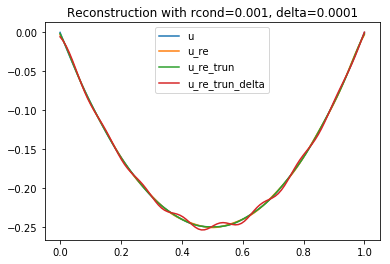

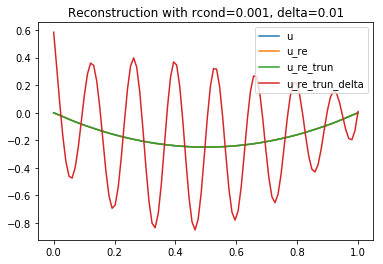

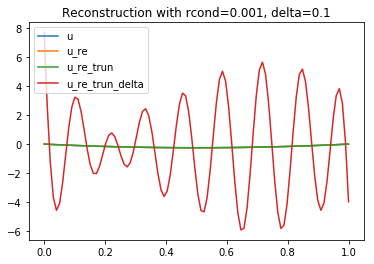

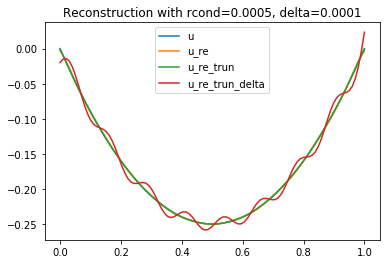

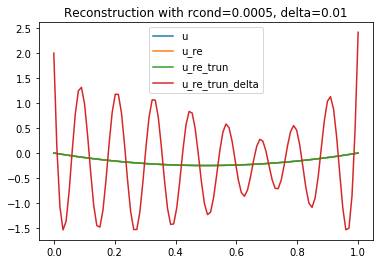

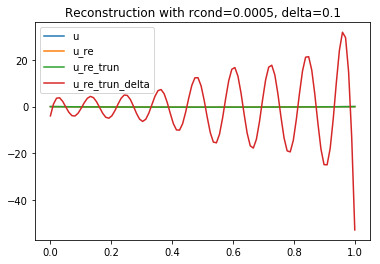

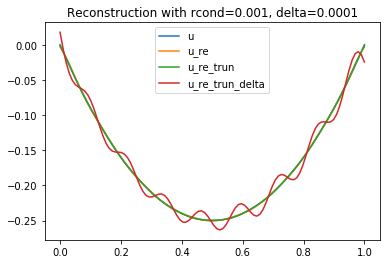

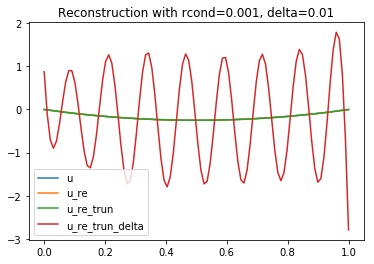

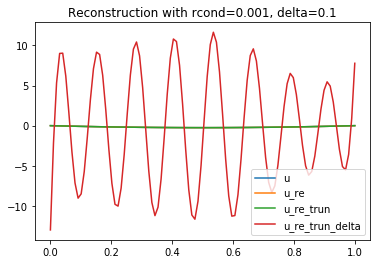

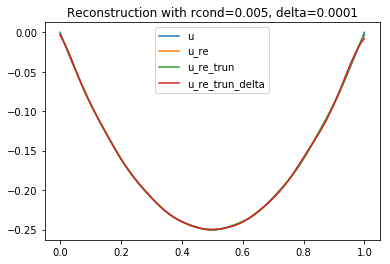

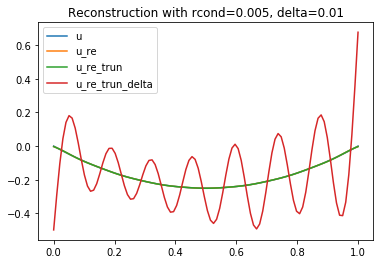

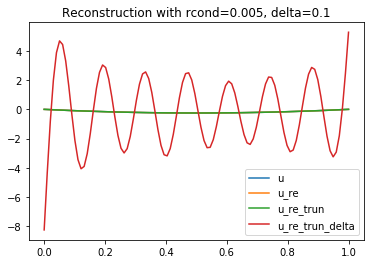

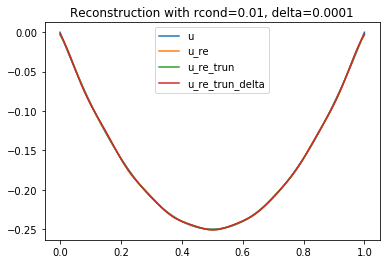

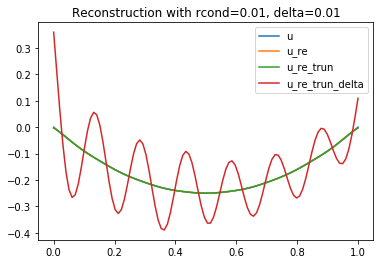

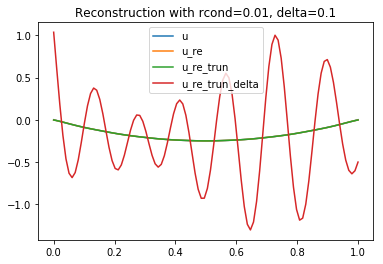

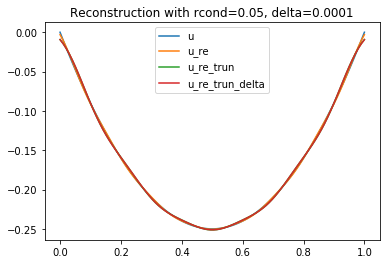

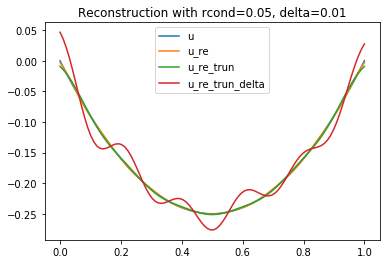

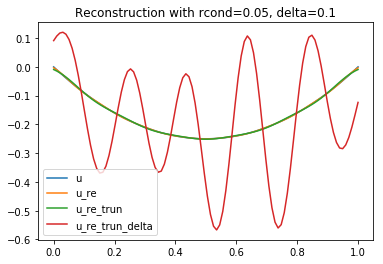

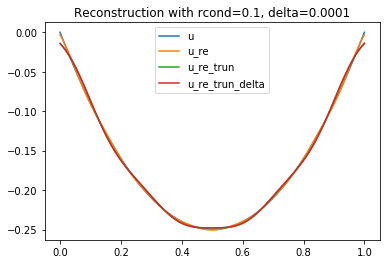

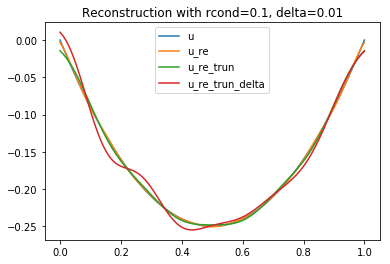

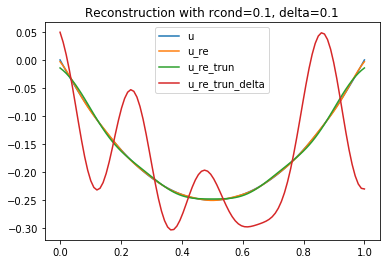

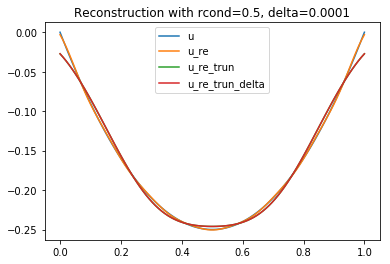

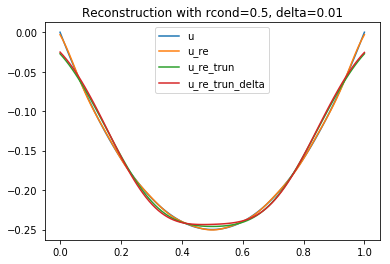

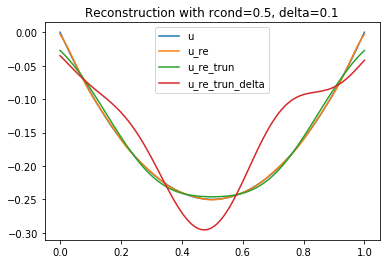

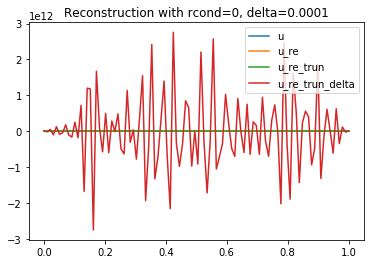

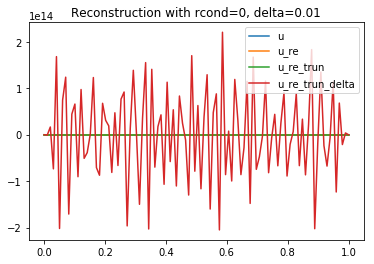

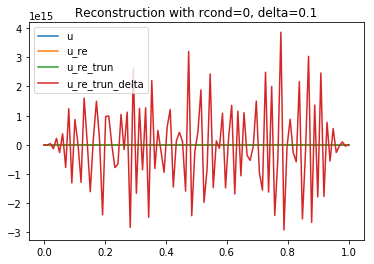

In [28]:
for k in [0.001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,0]:
    print(" --- Backward error for rcond={} --- ".format(k))
    for delta in [0.0001, 0.01, 0.1]:
        K_pseudo_truncated = np.linalg.pinv(K, rcond=k)
        f_delta = K@u_scen2 + delta*np.random.randn(n)
        error = np.linalg.norm(u_scen2-K_pseudo@f_delta)
        print("Backward error for delta = {} is {}".format(delta,error))
        plt.figure()
        plt.title("Reconstruction with rcond={}, delta={}".format(k,delta))
        plt.plot(x,u_scen2,label='u')
        plt.plot(x,K_pseudo@f_scen2,label='u_re')  
        plt.plot(x,K_pseudo_truncated@f_scen2,label='u_re_trun')
        plt.plot(x,K_pseudo_truncated@f_delta,label='u_re_trun_delta')
        plt.legend()
plt.show()

The value for which the backward error is the lowest is $rcond=0.1$. In the images we see however that for $rcond=0.5$ the best result is achieved. 

## Notice

For scenario 1 we see that we can find a truncation parameter such that the reconstruction with error approaches the reconstruction without error. For scenario 2 this is not working. 

# Exercise 4

## Scenario 1

### Plots

9


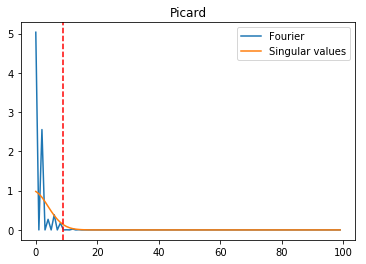

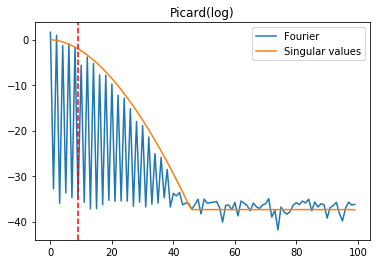

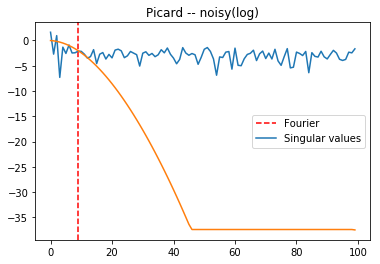

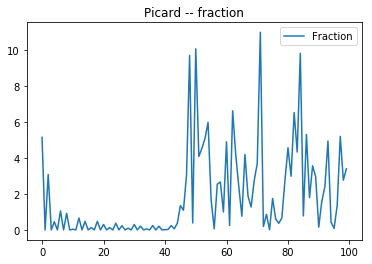

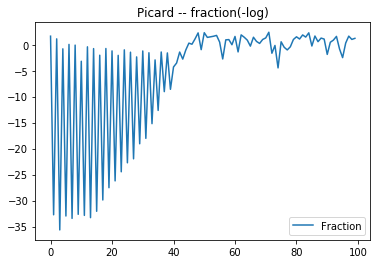

In [41]:
U, S, V = np.linalg.svd(K)
fourier = np.abs(np.transpose(U)@f_scen1)
fraction = fourier/S

delta = 0.1
f_delta = f_scen1+delta*np.random.randn(n)
noisy_fourier = np.abs(np.transpose(U)@f_delta)
noisy_fraction = noisy_fourier/S

rcond = 0.1
rcond_line = [ n for n,i in enumerate(S) if i>rcond ][-1]

plt.figure()
plt.title("Picard")
plt.plot(fourier)
plt.plot(S)
plt.axvline(x=rcond_line, linestyle='--',color='r')
plt.legend(["Fourier", "Singular values"])

plt.figure()
plt.title("Picard(log)")
plt.plot(np.log(fourier))
plt.plot(np.log(S))
plt.axvline(x=rcond_line, linestyle='--',color='r')
plt.legend(["Fourier", "Singular values"])

plt.figure()
plt.title("Picard -- noisy(log)")
plt.axvline(x=rcond_line, linestyle='--',color='r')
plt.plot(np.log(noisy_fourier))
plt.plot(np.log(S))
plt.legend(["Fourier", "Singular values"])

plt.figure()
plt.title("Picard -- fraction")
plt.plot(fraction)
plt.legend(["Fraction"])

plt.figure()
plt.title("Picard -- fraction(-log)")
plt.plot(np.log(fraction))
plt.legend(["Fraction"])


plt.show()

## Scenario 2

### Plots

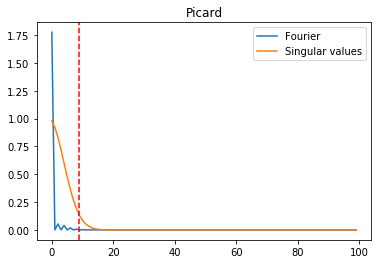

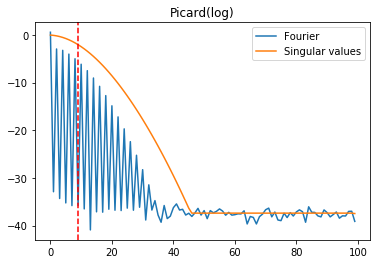

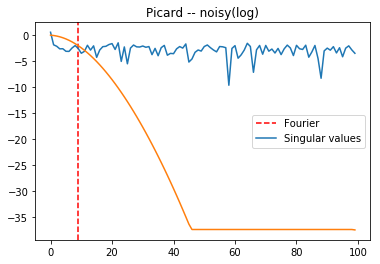

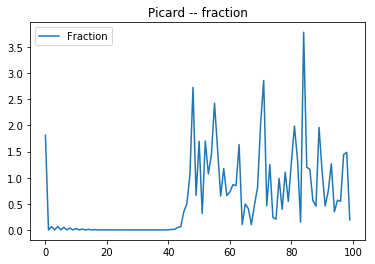

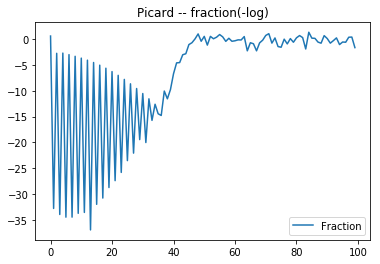

In [42]:
U, S, V = np.linalg.svd(K)
fourier = np.abs(np.transpose(U)@f_scen2)
fraction = fourier/S

delta = 0.1
f_delta = f_scen2+delta*np.random.randn(n)
noisy_fourier = np.abs(np.transpose(U)@f_delta)
noisy_fraction = noisy_fourier/S

rcond = 0.1
rcond_line = [ n for n,i in enumerate(S) if i>rcond ][-1]

plt.figure()
plt.title("Picard")
plt.plot(fourier)
plt.plot(S)
plt.axvline(x=rcond_line, linestyle='--',color='r')
plt.legend(["Fourier", "Singular values"])

plt.figure()
plt.title("Picard(log)")
plt.plot(np.log(fourier))
plt.plot(np.log(S))
plt.axvline(x=rcond_line, linestyle='--',color='r')
plt.legend(["Fourier", "Singular values"])

plt.figure()
plt.title("Picard -- noisy(log)")
plt.axvline(x=rcond_line, linestyle='--',color='r')
plt.plot(np.log(noisy_fourier))
plt.plot(np.log(S))
plt.legend(["Fourier", "Singular values"])

plt.figure()
plt.title("Picard -- fraction")
plt.plot(fraction)
plt.legend(["Fraction"])

plt.figure()
plt.title("Picard -- fraction(-log)")
plt.plot(np.log(fraction))
plt.legend(["Fraction"])


plt.show()

### Notice

If we only consider the first 40 singular values we see that the Picard condition holds for the noise free cases. For the noise free cases the Picard condition only holds for the singular values on the left. Based on this we would expect that truncating the singular values leads to a better result in the noise free cases. This is exactly what we have seen in exercise 3. In that exercise we truncated the singular values below a certain threshold. The threshold with the best results coincides in the figures with the red line.